In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv("data/AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df["Month"][1] - df["Month"][0]

Timedelta('31 days 00:00:00')

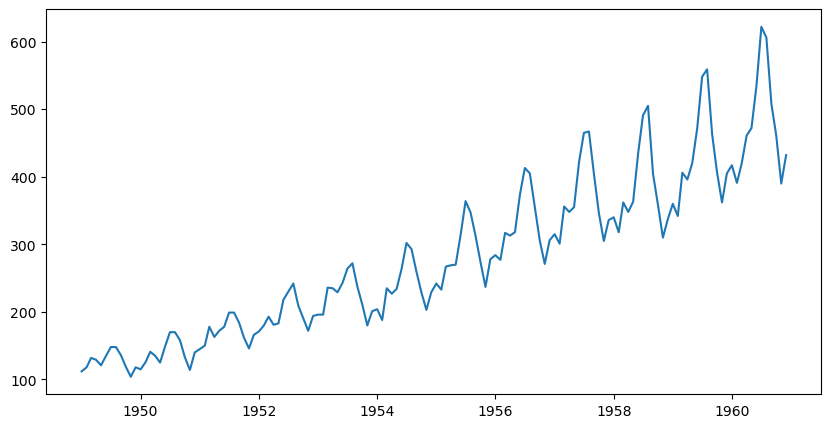

In [3]:
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["#Passengers"])
plt.show()

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_46675/4017038392.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  quarterly_trend = df.rolling(window=3).mean()
/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_46675/4017038392.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  yearly_trend = df.rolling(window=12).mean()


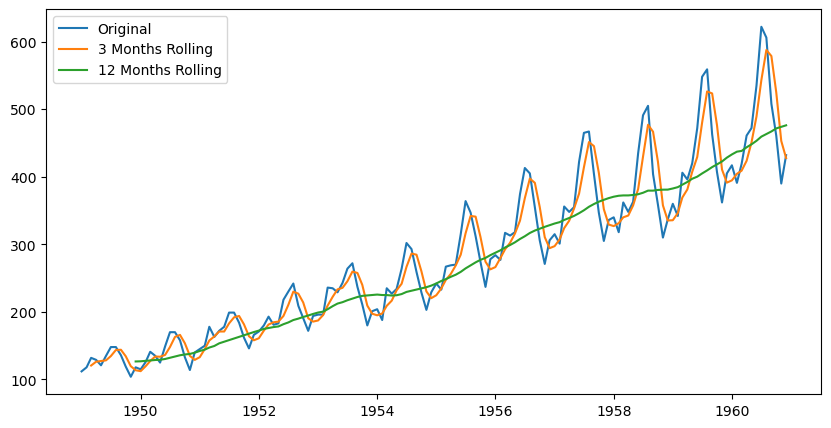

In [22]:
quarterly_trend = df.rolling(window=3).mean()
yearly_trend = df.rolling(window=12).mean()
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["#Passengers"], label="Original")
plt.plot(df["Month"], quarterly_trend, label="3 Months Rolling")
plt.plot(df["Month"], yearly_trend, label="12 Months Rolling")
plt.legend()
plt.show()

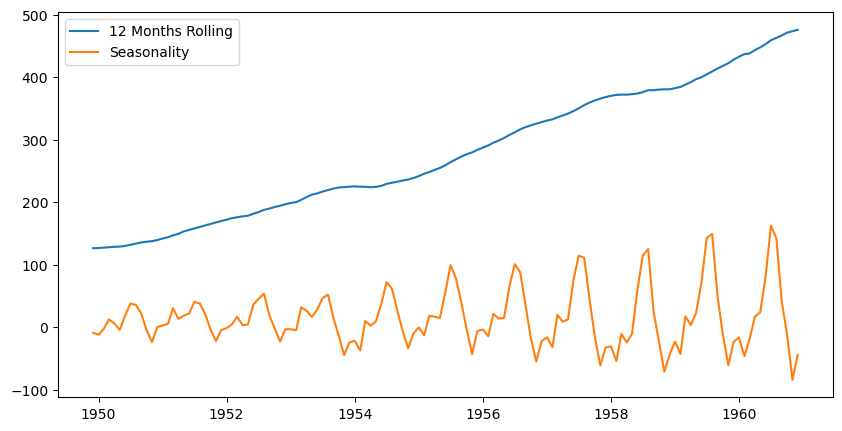

In [21]:
seasonality = df["#Passengers"].values - yearly_trend.values.T[0]
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], yearly_trend, label="12 Months Rolling")
plt.plot(df["Month"], seasonality, label="Seasonality")
plt.legend()
plt.show()

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_46675/2471146423.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolling_std = df.rolling(window=12).std()


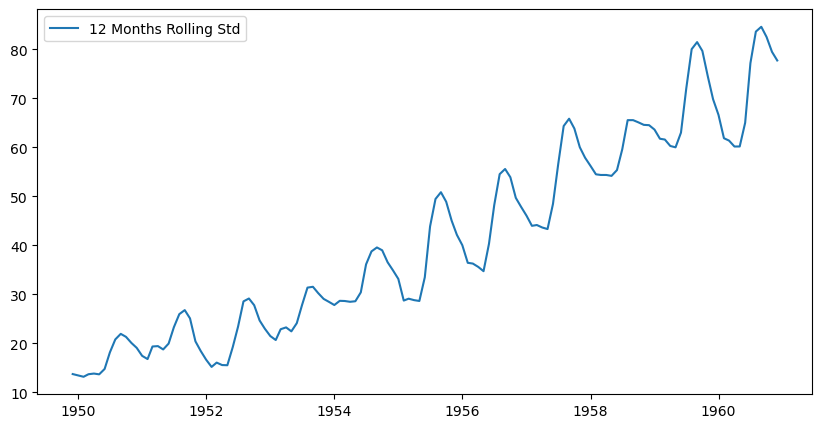

In [23]:
rolling_std = df.rolling(window=12).std()
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], rolling_std, label="12 Months Rolling Std")
plt.legend()
plt.show()

In [24]:
from scipy.signal import find_peaks

peaks = find_peaks(seasonality)
peaks

(array([ 14,  18,  26,  30,  38,  43,  47,  50,  55,  60,  62,  66,  72,
         74,  78,  84,  86,  90,  96,  98, 102, 108, 110, 115, 120, 122,
        127, 132, 138]),
 {})

In [29]:
seasonality[peaks[0]]

array([ 1.26666667e+01,  3.78333333e+01,  3.07500000e+01,  4.06666667e+01,
        1.69166667e+01,  5.40000000e+01, -3.00000000e+00,  3.20000000e+01,
        5.22500000e+01, -2.16666667e+01,  1.00833333e+01,  7.24166667e+01,
       -8.33333333e-02,  1.85000000e+01,  9.95833333e+01, -3.50000000e+00,
        2.16666667e+01,  1.01000000e+02, -1.58333333e+01,  1.99166667e+01,
        1.14583333e+02, -3.05000000e+01, -1.04166667e+01,  1.25500000e+02,
       -2.26666667e+01,  1.76666667e+01,  1.49583333e+02, -1.60833333e+01,
        1.62583333e+02])